# Project Title:
### Predictive Modeling for Breast Cancer Diagnosis Using Machine Learning


# Feature Descriptions for Breast Cancer Dataset

- **id**: Unique identifier for each sample.
- **diagnosis**: Target variable indicating the diagnosis (**M** = Malignant, **B** = Benign).

#### Mean Features:
- **radius_mean**: Mean radius of the tumor cells.
- **texture_mean**: Mean texture (variation in gray levels) of the tumor cells.
- **perimeter_mean**: Mean perimeter of the tumor cells.
- **area_mean**: Mean area of the tumor cells.
- **smoothness_mean**: Mean smoothness (local variation in radius lengths) of the tumor cells.
- **compactness_mean**: Mean compactness (perimeter² / area - 1.0) of the tumor cells.
- **concavity_mean**: Mean concavity (severity of concave portions of the contour) of the tumor cells.
- **concave points_mean**: Mean number of concave portions of the tumor cell contours.
- **symmetry_mean**: Mean symmetry of the tumor cells.
- **fractal_dimension_mean**: Mean fractal dimension ("coastline approximation") of the tumor cells.

#### Standard Error Features:
- **radius_se**: Standard error of the radius of the tumor cells.
- **texture_se**: Standard error of the texture of the tumor cells.
- **perimeter_se**: Standard error of the perimeter of the tumor cells.
- **area_se**: Standard error of the area of the tumor cells.
- **smoothness_se**: Standard error of the smoothness of the tumor cells.
- **compactness_se**: Standard error of the compactness of the tumor cells.
- **concavity_se**: Standard error of the concavity of the tumor cells.
- **concave points_se**: Standard error of the number of concave portions of the tumor cell contours.
- **symmetry_se**: Standard error of the symmetry of the tumor cells.
- **fractal_dimension_se**: Standard error of the fractal dimension of the tumor cells.

#### Worst (Largest) Features:
- **radius_worst**: Largest (worst) radius of the tumor cells.
- **texture_worst**: Largest (worst) texture of the tumor cells.
- **perimeter_worst**: Largest (worst) perimeter of the tumor cells.
- **area_worst**: Largest (worst) area of the tumor cells.
- **smoothness_worst**: Largest (worst) smoothness of the tumor cells.
- **compactness_worst**: Largest (worst) compactness of the tumor cells.
- **concavity_worst**: Largest (worst) concavity of the tumor cells.
- **concave points_worst**: Largest (worst) number of concave portions of the tumor cell contours.
- **symmetry_worst**: Largest (worst) symmetry of the tumor cells.
- **fractal_dimension_worst**: Largest (worst) fractal dimension of the tumor cells.


##  Import Libraries

In [4]:
#  Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Load the Cancer Wisconsin dataset

In [6]:
df = pd.read_csv('Cancer Wisconsin.csv')

In [7]:
 df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Information of dataset

In [9]:
 df.shape

(569, 33)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Check The Column Names

In [12]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# Rename The Columns

In [20]:
df = df.rename(columns={
    'concave points_mean': 'concave_points_mean',
    'concave points_worst': 'concave_points_worst',
})

# Data Cleaning

In [23]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave_points_worst         0
symmetry_worst               0
fractal_dimension_wor

In [25]:
# Drop Unwanted Columns 
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [27]:
# Check the balance of the target classes
df['diagnosis'].value_counts()


diagnosis
B    357
M    212
Name: count, dtype: int64

In [29]:
# Change The Diagnosis in Numeric (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

# Check The Duplicate Values

In [32]:
# check the duplicate values
df.duplicated().sum()


0

# Summary Statistics

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


#  Data Exploration 

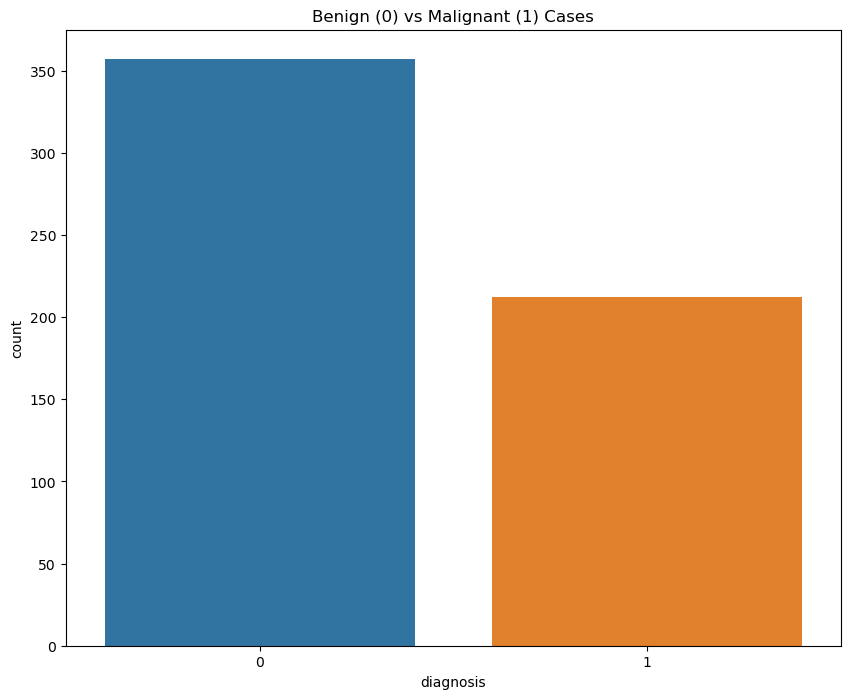

In [39]:
# 4.1 Diagnosis Count Plot
plt.figure(figsize=(10,8))
sns.countplot(x='diagnosis', data=df)
plt.title("Benign (0) vs Malignant (1) Cases")
plt.show()

### Correlation Matrix

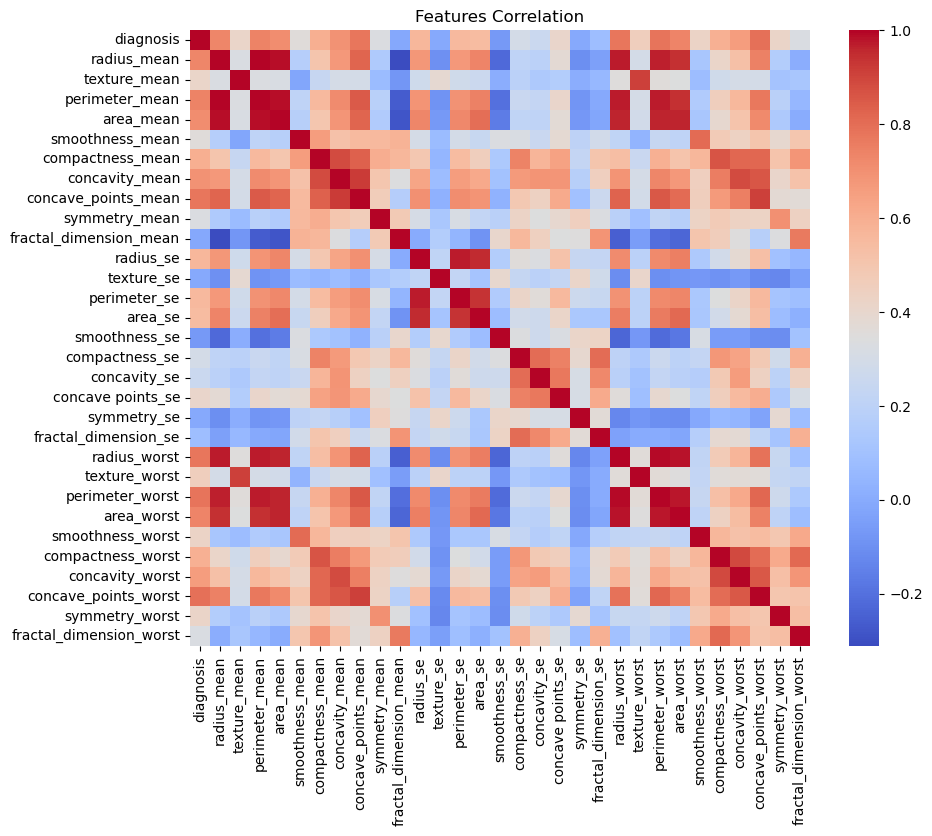

In [42]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Features Correlation")
plt.show()


# Define independent variables (X) and dependent variable (Y)

In [45]:
# Features (X) and Target (y) 
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Feature Scaling

In [48]:
#  Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split Data into Training & Testing Sets

In [51]:
#  Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Defining & Training  All The Model For Choosing the Best Model

In [54]:
# Test Of Multiple Models 
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),

}

In [56]:

results = []
for name, model in models.items():
    # Model Training 
    model.fit(X_train, y_train)
    
    # For Predictions 
    y_pred = model.predict(X_test)
    
    # Check Performance 
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("*"*60)
    results.append([name, acc, f1])
    
    # Classification Report
    print(f"\nModel: {name} \n")
    print("Accuracy:", round(acc, 4))
    print("F1 Score:", round(f1, 4))
    print("*"*60)
    print("Classification Report:\n", classification_report(y_test, y_pred))


************************************************************

Model: Logistic Regression 

Accuracy: 0.9737
F1 Score: 0.9647
************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

************************************************************

Model: Decision Tree 

Accuracy: 0.9386
F1 Score: 0.9176
************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.

# Drop Highly Correlated Features

### Calculate correlation matrix

In [61]:
# Calculate correlation matrix
corr_matrix = X.corr().abs()

### Select upper triangle of correlation matrix

In [64]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

### Find features with correlation > 0.95

In [67]:

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Highly correlated features:", to_drop)


Highly correlated features: ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


###  Remove Multicollinearity 

In [70]:
# Drop them
X_reduced = X.drop(to_drop, axis=1)

# Display Summary Of Results

In [73]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X_reduced)
logit_model = sm.Logit(y, X_with_const).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.036903
         Iterations 23
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      545
Method:                           MLE   Df Model:                           23
Date:                Wed, 16 Apr 2025   Pseudo R-squ.:                  0.9441
Time:                        11:49:56   Log-Likelihood:                -20.998
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                4.545e-135
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -103.8447     36.003     -2.884      0.004    -174.409  

*  **The model is indeed showing good accuracy; however, analysis revealed that out of the 31 features, only 8 to 10 are truly significant. This indicates that the model is also utilizing some irrelevant or noisy features, which could lead to overfitting. In the next phase, I plan to apply feature selection techniques to optimize the model and improve its interpretability.**

 ### **Feature Selection:** Using Only Significant Features for Overfitting-Free Model

In [86]:
# Features (X) and Target (y) 
X = df[[
'radius_mean',
'radius_se',
'texture_se',
'concavity_se',
'fractal_dimension_se',
'texture_worst',
'symmetry_worst',
'fractal_dimension_worst']]

y = df['diagnosis']

#  Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Again Check And Drop Highly Correlated Features

In [90]:

# Calculate correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Highly correlated features:", to_drop)

# Drop them
X_reduced = X.drop(to_drop, axis=1)


Highly correlated features: []


# Again Check And Display Summary Of Results

In [93]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X_reduced)
logit_model = sm.Logit(y, X_with_const).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.083104
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      560
Method:                           MLE   Df Model:                            8
Date:                Wed, 16 Apr 2025   Pseudo R-squ.:                  0.8741
Time:                        11:50:29   Log-Likelihood:                -47.286
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.375e-136
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -47.7101      6.429     -7.421      0.000     -60.311  

# Results Comparison

In [96]:
# Summary table
# Results Comparison 
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score'])
print("\nModels Comparison:")
results_df.sort_values('F1 Score', ascending=False)


Models Comparison:


,Model,Accuracy,F1 Score
0,Logistic Regression,0.973684,0.964706
3,Support Vector Machine,0.973684,0.964706
2,Random Forest,0.964912,0.952381
4,Naive Bayes,0.964912,0.952381
1,Decision Tree,0.938596,0.917647


# Model Performance

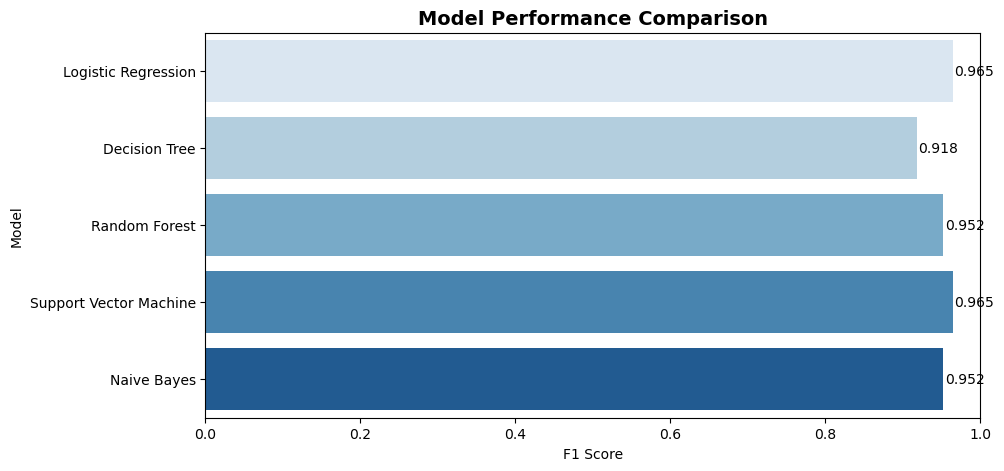

In [99]:
import seaborn as sns
# Plot Model Performance
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="F1 Score", y="Model", data=results_df, palette="Blues")

# Add annotations (F1 Score on bars)
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", fontsize=10, color="black", padding=1)

# Set title and limits
plt.title("Model Performance Comparison", fontsize=14, fontweight="bold")
plt.xlim(0, 1)  #F1 Score range

# Show plot
plt.show()

#  Best Model Of Confusion Matrix 

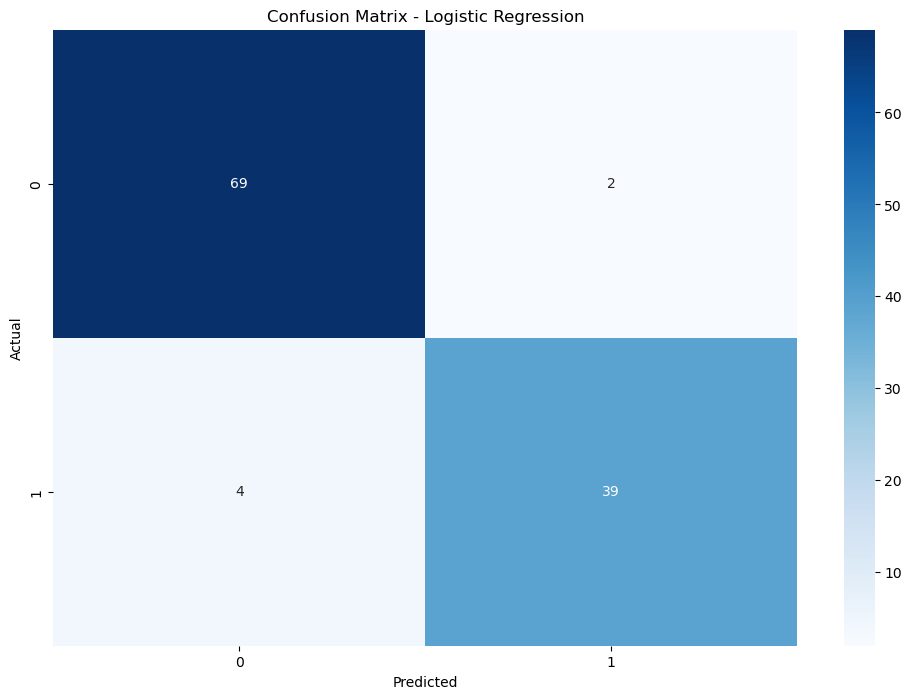

In [102]:
#  Best Model Of Confusion Matrix 
plt.figure(figsize=(12, 8))
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Choose The Best Model
* Support Vector Machine And Logistic Regression Model is the best model for batter prediction

# Prediction

### Actual Data

In [105]:
df[[
'radius_mean',
'radius_se',
'texture_se',
'concavity_se',
'fractal_dimension_se',
'texture_worst',
'symmetry_worst',
'fractal_dimension_worst',
'diagnosis']].tail(2)

,radius_mean,radius_se,texture_se,concavity_se,fractal_dimension_se,texture_worst,symmetry_worst,fractal_dimension_worst,diagnosis
567,20.60,0.7260,1.595,0.07117,0.006185,39.42,0.4087,0.12400,1
568,7.76,0.3857,1.428,0.00000,0.002783,30.37,0.2871,0.07039,0


#### No Cancer data 


In [107]:
    new_patient_no_cancer= pd.DataFrame ([{'radius_mean': 7.76,
                                 'radius_se': 0.3857,
                                 'texture_se': 1.4280, 
                                 'concavity_se': 0.00000,
                                 'fractal_dimension_se': 0.002783,
                                 'texture_worst': 30.37,
                                 'symmetry_worst': 0.2871,
                                 'fractal_dimension_worst':	0.07039
                                 }])

In [109]:
new_patient_no_cancer

,radius_mean,radius_se,texture_se,concavity_se,fractal_dimension_se,texture_worst,symmetry_worst,fractal_dimension_worst
0,7.76,0.3857,1.428,0.0,0.002783,30.37,0.2871,0.07039


In [111]:


#  Feature Scaling for New Data
new_patient_scaled = scaler.transform(new_patient_no_cancer)

# Prediction
prediction = best_model.predict(new_patient_scaled)
prediction_proba = best_model.predict_proba(new_patient_scaled)

#  Result Display
print("\nNew Patient Prediction:")
print("Predicted Class:", "Malignant (Cancer)" if prediction[0] == 1 else "Benign (No Cancer)")
print("Probability [Benign, Malignant]:", prediction_proba[0])



New Patient Prediction:
Predicted Class: Benign (No Cancer)
Probability [Benign, Malignant]: [0.99838012 0.00161988]


#### Cancer data


In [114]:
  new_patient= pd.DataFrame ([{  'radius_mean': 20.60,
                                 'radius_se': 0.7260,
                                 'texture_se': 1.5950,
                                 'concavity_se': 0.07117,
                                 'fractal_dimension_se': 0.006185,
                                 'texture_worst': 39.42,
                                 'symmetry_worst': 0.4087,
                                 'fractal_dimension_worst':	0.12400
                                 }])

In [116]:
new_patient

,radius_mean,radius_se,texture_se,concavity_se,fractal_dimension_se,texture_worst,symmetry_worst,fractal_dimension_worst
0,20.6,0.726,1.595,0.07117,0.006185,39.42,0.4087,0.124


In [118]:


#  Feature Scaling for New Data
new_patient_scaled = scaler.transform(new_patient)

# Prediction
prediction = best_model.predict(new_patient_scaled)
prediction_proba = best_model.predict_proba(new_patient_scaled)

#  Result Display
print("\nNew Patient Prediction:")
print("Predicted Class:", "Malignant (Cancer)" if prediction[0] == 1 else "Benign (No Cancer)")
print("Probability [Benign, Malignant]:", prediction_proba[0])



New Patient Prediction:
Predicted Class: Malignant (Cancer)
Probability [Benign, Malignant]: [1.93916098e-07 9.99999806e-01]


# Run The Model in Streamlit Web App

In [122]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

# Select the 8 features used for prediction
X = df[['radius_mean', 'radius_se', 'texture_se', 'concavity_se', 'fractal_dimension_se',
          'texture_worst', 'symmetry_worst', 'fractal_dimension_worst']]
y = df['diagnosis']  # Assuming 'diagnosis' is the target column

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model (Logistic Regression as an example)
model = LogisticRegression()
model.fit(X_scaled, y)

# Save the trained model and scaler
with open('cancer_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved!")


Model and scaler saved!


In [125]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

# Load saved model and scaler
with open('cancer_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# App title and description
st.title("🔬 Breast Cancer Prediction App")
st.write("""
This app predicts whether a breast tumor is **Malignant (Cancerous)** or **Benign (Non-Cancerous)** 
using machine learning. Enter the patient's details below:
""")

# Input form
st.header("Patient Details")
with st.form("prediction_form"):
    # Create input fields for the 8 features
    col1, col2 = st.columns(2)
    
    with col1:
        radius_mean = st.number_input("Radius Mean", min_value=0.0, value=7.76)
        radius_se = st.number_input("Radius SE", min_value=0.0, value=0.3857)
        texture_se = st.number_input("Texture SE", min_value=0.0, value=1.4280)
        concavity_se = st.number_input("Concavity SE", min_value=0.0, value=0.00000)
        
        
    with col2:
        texture_worst = st.number_input("Texture Worst", min_value=0.0, value=30.37)
        symmetry_worst = st.number_input("Symmetry Worst", min_value=0.0, value=0.2871)
        fractal_dimension_worst = st.number_input("Fractal Dimension Worst", min_value=0.0, value=0.07039)
        fractal_dimension_se = st.number_input("Fractal Dimension SE", min_value=0.0, value=0.002783)
    
    submit_button = st.form_submit_button("Predict Diagnosis")

# Prediction logic
if submit_button:
    # Create feature array with only the 8 selected features
    features = np.array([[
        radius_mean, radius_se, texture_se, concavity_se, fractal_dimension_se,
        texture_worst, symmetry_worst, fractal_dimension_worst
    ]])
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Make prediction
    prediction = model.predict(features_scaled)
    probability = model.predict_proba(features_scaled)
    
    # Display results
    st.header("Prediction Results")
    if prediction[0] == 1:
        st.error(f"🚨 **Prediction:** Malignant (Cancerous) - {probability[0][1]*100:.2f}% probability")
    else:
        st.success(f"✅ **Prediction:** Benign (Non-Cancerous) - {probability[0][0]*100:.2f}% probability")
    
    # Show probability breakdown
    st.write(f"**Probability Breakdown:**")
    st.write(f"- Benign: {probability[0][0]*100:.2f}%")
    st.write(f"- Malignant: {probability[0][1]*100:.2f}%")

# Run instructions
st.sidebar.header("How to Use")
st.sidebar.write("""
1. Enter patient's tumor characteristics
2. Click 'Predict Diagnosis'
3. View results
""")



Overwriting app.py


In [127]:
import subprocess
import sys

# Install streamlit if not installed
subprocess.check_call([sys.executable, "-m", "pip", "install", "streamlit"])

# Run the streamlit app
subprocess.Popen([sys.executable, "-m", "streamlit", "run", "app.py"])


<Popen: returncode: None args: ['C:\\ProgramData\\anaconda3\\python.exe', '-...>